# Innoplexus Online Hiring Hackathon: Artificial Intelligence (AI) Challenge
**Analytics Vidya**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/canf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
train.head()

,Webpage_id,Domain,Url,Tag
0,1,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news
1,2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news
2,3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news
3,4,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-bi...,news
4,5,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-...,news


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53447 entries, 0 to 53446
Data columns (total 4 columns):
Webpage_id    53447 non-null int64
Domain        53447 non-null object
Url           53447 non-null object
Tag           53447 non-null object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25787 entries, 0 to 25786
Data columns (total 3 columns):
Webpage_id    25787 non-null int64
Domain        25787 non-null object
Url           25787 non-null object
dtypes: int64(1), object(2)
memory usage: 604.5+ KB


###### Conclusion 1:
No missing values or NaN

In [5]:
print(train.Tag.value_counts())

others            17417
news               7992
publication        7705
profile            5196
conferences        4666
forum              4503
clinicalTrials     2839
thesis             1800
guidelines         1329
Name: Tag, dtype: int64


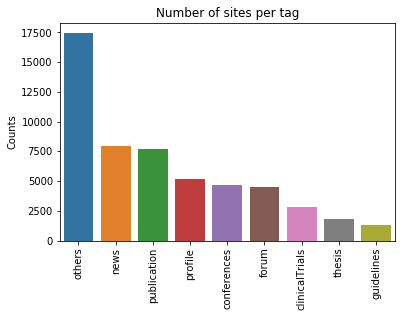

In [6]:
sns.barplot(x=train.Tag.value_counts().index, y=train.Tag.value_counts(), data=train)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Number of sites per tag');

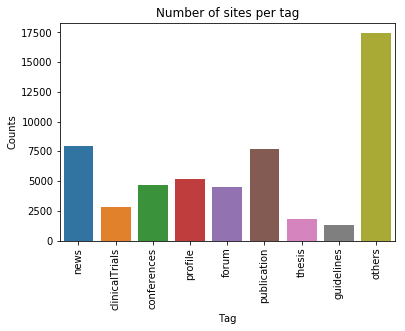

In [7]:
sns.countplot(x='Tag', data=train)
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Number of sites per tag');

###### Conclusion 2:
Some undersampling. Others concentrate most of the sites per tag.

In [8]:
train.Domain.value_counts()
print(train.Domain.nunique())

3974


##### Use tags instead of HTML

In [9]:
def url_to_tags(URL):
    URL=URL.strip()
    domain_substitution = re.sub(r'\.com','',URL)
    HTTPS_strip_1 = re.sub('https?://www','',domain_substitution)
    HTTPS_strip_2 = re.sub('https?://','',HTTPS_strip_1)
    try:
        no_encoding = HTTPS_strip_2.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = HTTPS_strip_2
    no_numbers = re.sub("[^a-zA-Z]", " ",no_encoding) 
    lower_characters = no_numbers.lower().split()                             
    stops = set(stopwords.words("english"))                  
    words = [w for w in lower_characters if not w in stops] 
    return( " ".join( words )) 

In [10]:
train['url_to_tags'] = train['Url'].astype(str).apply(lambda x: url_to_tags(x))
train_final = train.drop(['Webpage_id','Domain','Url'],axis=1)
train_final.head()

,Tag,url_to_tags
0,news,fiercepharma marketing tecfidera gilenya aubag...
1,news,fiercepharma pharma novo equipped weather stor...
2,news,fiercepharma pharma another exec departs troub...
3,news,fiercepharma pharma teva buy biosim specialist...
4,news,fiercepharma marketing actress marissa tomei p...


In [11]:
test['url_to_tags'] = test['Url'].astype(str).apply(lambda x: url_to_tags(x))
test_final = test.drop(['Webpage_id','Domain','Url'],axis=1)
test_final.head()

,url_to_tags
0,isrctn isrctn
1,clinicaltrialsregister eu ctr search trial gb
2,clinicaltrialsregister eu ctr search trial lt
3,clinicaltrialsregister eu ctr search trial
4,clinicaltrialsregister eu ctr search trial nl


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [13]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('clf', LogisticRegression(verbose=1,class_weight='balanced',solver='sag',tol=0.01,C=0.5))
])
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'bow', 'clf', 'bow__analyzer', 'bow__binary', 'bow__decode_error', 'bow__dtype', 'bow__encoding', 'bow__input', 'bow__lowercase', 'bow__max_df', 'bow__max_features', 'bow__min_df', 'bow__ngram_range', 'bow__preprocessor', 'bow__stop_words', 'bow__strip_accents', 'bow__token_pattern', 'bow__tokenizer', 'bow__vocabulary', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [14]:
pipeline.fit(train_final['url_to_tags'],train_final['Tag'])

convergence after 21 epochs took 1 seconds
convergence after 34 epochs took 0 seconds
convergence after 30 epochs took 1 seconds
convergence after 31 epochs took 0 seconds
convergence after 38 epochs took 1 seconds
convergence after 25 epochs took 0 seconds
convergence after 34 epochs took 0 seconds
convergence after 44 epochs took 1 seconds
convergence after 23 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.0s finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...1, penalty='l2', random_state=None,
          solver='sag', tol=0.01, verbose=1, warm_start=False))])

In [15]:
predictions = pipeline.predict(test_final['url_to_tags'])

In [16]:
predictions

array(['clinicalTrials', 'clinicalTrials', 'clinicalTrials', ...,
       'others', 'others', 'others'], dtype=object)

In [18]:
submission=pd.read_csv('../data/sample_submission.csv')
submission['Tag']=predictions
submission.to_csv('../data/final_submission.csv',index=False)